In [32]:
import os
import glob
import collections
import pandas as pd
import pickle

import numpy as np
import matplotlib.pyplot as plt

pth_dict = {
    4: {
        "pythia-410m": "./results/n-grams/wmt09_gens/pile/410m/pythia-410m/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/4/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "./results/n-grams/wmt09_gens/pile/exp_3/test-set/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/4/examples_dfs_0-shot_common_pythia_models.pkl"
    },

    2: {
        "pythia-410m": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/pythia-410m/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/2/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/pythia-12b/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/2/examples_dfs_0-shot_common_pythia_models.pkl",
    }
}

def load_dfs(pth_dict):
    dfs = {}
    for k, v in pth_dict.items():
        dfs[k] = {}
        for model, pth in v.items():
            with open(pth, "rb") as f:
                dfs[k][model] = pickle.load(f)[model]
    return dfs

dfs = load_dfs(pth_dict)

In [30]:
df_4_12b = dfs[4]["pythia-12b"]
df_4_410m = dfs[4]["pythia-410m"]

Text(0.5, 1.0, 'Pair Alignment Score Distribution ngram=4')

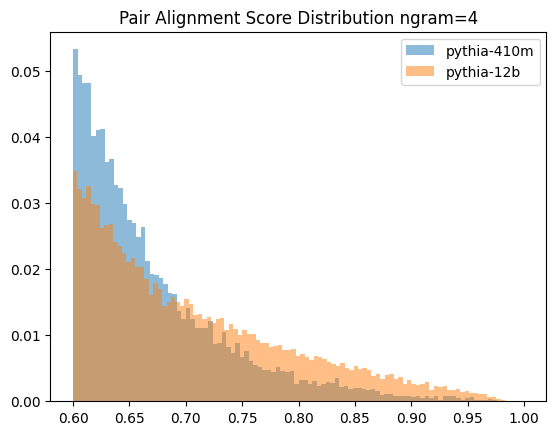

In [28]:
# plt.hist(df_4_12b["alignment_score"], bins=100)
# plt.hist(df_4_410m["alignment_score"], bins=100)

"""
alignment score distribution:
this is just to how that in general,
the generations of the model, match
better aligned pairs from the pretraining data

note: still confounding variables
key: move beyond this to composability
"""

def plot_distribution(df_dict, variable):
    for k, v in df_dict.items():
        values = v[variable]
        weights = np.ones_like(values) / float(len(values))
        plt.hist(values, bins=100, weights=weights, alpha=0.5, label=k)
    plt.legend()

plot_distribution(dfs[4], "alignment_score")
plt.title("Pair Alignment Score Distribution ngram=4")

In [33]:
dfs.keys()

dict_keys([4, 2])

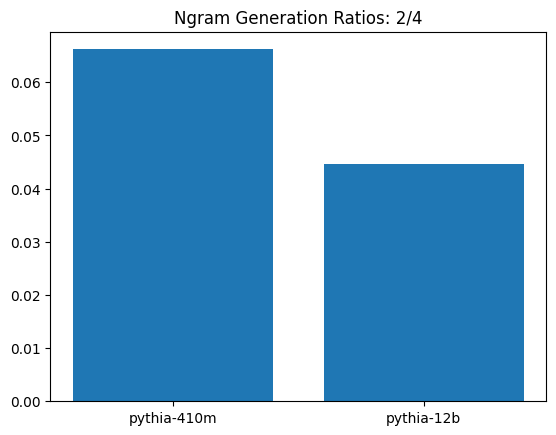

In [40]:
def compare_ngram_dist(dfs, ngrams):
    ngrams = sorted(ngrams)
    ngram_dists = collections.defaultdict(dict)
    for ngram in ngrams:
        for model, df in dfs[ngram].items():
            # find unique lang_1, lang_2 pairs
            ngram_dists[ngram][model] = df[['lang_1', 'lang_2']].drop_duplicates(inplace=False)

    # # plot normalized distribution of ngrams for models
    # for model in dfs[ngrams[0]].keys():
    #     plt.figure()
    #     for ngram in ngrams:
    #         ngram_dists[ngram][model].plot.hist(bins=100, alpha=0.5, label=ngram)
    #     plt.legend()
    #     plt.title(f"ngram distribution for {model}")

    # compute ratios
    ngram_rations = {}
    for model in dfs[ngrams[0]].keys():
        ngram_rations[model] = {}
        ngram_rations[model] = len(ngram_dists[ngrams[0]][model]) / len(ngram_dists[ngrams[1]][model])
    
    # plot ratios as bar chart
    plt.figure()
    plt.title(f"Ngram Generation Ratios: {ngrams[0]}/{ngrams[1]}")
    plt.bar(ngram_rations.keys(), ngram_rations.values())

    return ngram_dists

ngram_dists = compare_ngram_dist(dfs, [2, 4])